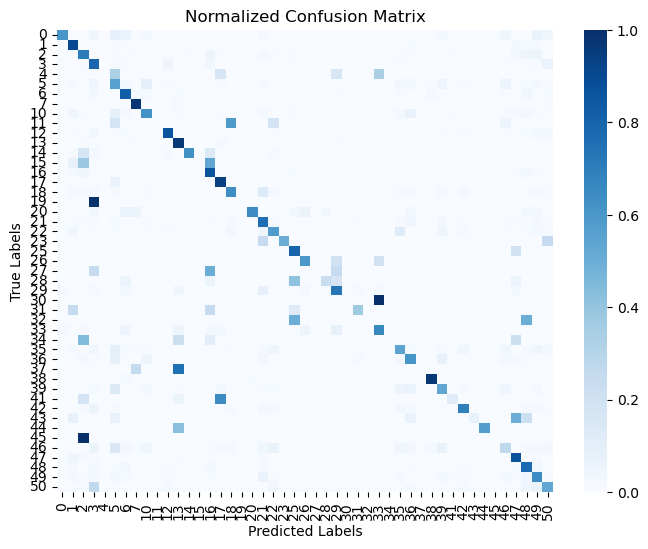

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

#let's make a confusion matrix from the results csv

root_path = '/home/Kathryn/code/ct_classifier/model_states-2025-01-17_21-39-55'

#read in csv
df = pd.read_csv(f'{root_path}/results.csv')
# print(df)

# #Let's work on a confusion matrix - I think we can I think we can
y_true = df['true']
y_pred = df['pred']

# # Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=False, fmt='.2f', cmap='Blues', 
            xticklabels=set(y_true), yticklabels=set(y_true))

# Titles and labels
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()
# #What if we want to customize our labels?
# #I need to figure out how to incorporate the list of category names
# #I think it comes from "labels" in dataset.py? but not sure. also not sure how to incorporate that
# labels = ['duiker_red', 'bushpig', 'oribi', 'genet']  # Replace with your actual class labels
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)